# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3-alpha.new.224'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Holy See']

,
 

4

: 

['Tanzania', 'Myanmar']

,
 

5

: 

[

'Brunei'

, 

'Fiji'

, 

'Tunisia'

, 

'Georgia'

, 

'Jordan'

, 

'Hungary'

,
     

'Papua New Guinea'

, 

'Grenada'

]

,
 

6

: 

[

'Cambodia'

, 

'Libya'

, 

'Yemen'

, 

'Equatorial Guinea'

, 

'Slovakia'

, 

'Slovenia'

,
     

'Mauritius'

, 

'Uganda'

, 

'Ireland'

, 

'Dominica'

, 

'Seychelles'

, 

'Belize'

,
     

'Jamaica'

, 

'Antigua and Barbuda'

]

,
 

7

: 

[

'Montenegro'

, 

'Australia'

, 

'Vietnam'

, 

'Netherlands'

, 

'Lebanon'

, 

'Lesotho'

,
     

'Gambia'

, 

'Andorra'

, 

'Colombia'

, 

'San Marino'

, 

'New Zealand'

, 

'Cyprus'

,
     

'Central African Republic'

, 

'Zimbabwe'

, 

'South Sudan'

, 

'Liechtenstein'

,
     

'Trinidad and Tobago'

, 

'Namibia'

, 

'Afghanistan'

, 

'Kyrgyzstan'

, 

'Guyana'

,
     

'Czech Republic'

, 

'Saint Vincent and the Grenadines'

, 

'Botswana'

, 

'Spain'

,
     

'Paraguay'

, 

'Kazakhstan'

, 

'Mozambique'

, 

'Nepal'

, 

'Comoros'

,
     

'Sao Tome and Principe'

, 

'Bahamas'

, 

'Monaco'

, 

'Malawi'

]

,
 

8

: 

[

'Angola'

, 

'Madagascar'

, 

'Djibouti'

, 

'Croatia'

, 

'Argentina'

, 

'Costa Rica'

,
     

'Austria'

, 

'Rwanda'

, 

'Lithuania'

, 

'Thailand'

, 

'Niger'

, 

'Kenya'

,
     

'Guinea-Bissau'

, 

'Sri Lanka'

, 

'Ethiopia'

, 

'Nicaragua'

, 

'Morocco'

,
     

'Palestine'

, 

'Saint Lucia'

, 

'Eritrea'

, 

'Burundi'

, 

'Denmark'

, 

'Mongolia'

,
     

'Zambia'

, 

'Israel'

]

,
 

9

: 

[

'Malta'

, 

'Benin'

, 

'Luxembourg'

, 

'Japan'

, 

'South Africa'

, 

'China'

, 

'Taiwan'

,
     

'Ghana'

, 

'Mauritania'

, 

'Suriname'

, 

'Sudan'

, 

'Greece'

, 

'Venezuela'

,
     

'Cameroon'

, 

'Swaziland'

, 

'Barbados'

, 

'Sierra Leone'

, 

'Haiti'

, 

'Ukraine'

,
     

'Tajikistan'

, 

'Bermuda'

, 

'Poland'

, 

'Bhutan'

, 

'Syria'

, 

'Iceland'

, 

'Qatar'

,
     

'Uruguay'

, 

'Maldives'

, 

'Ecuador'

, 

'Kosovo'

, 

'Korea, South'

, 

'Chad'

,
     

'Philippines'

, 

'Norway'

, 

'India'

]

,
 

10

: 

[

'Burkina Faso'

, 

'Oman'

, 

'Saudi Arabia'

, 

'Singapore'

, 

'Portugal'

,
      

'Senegal'

, 

'Serbia'

, 

'Chile'

, 

'Belarus'

, 

'Guatemala'

, 

'Albania'

,
      

'Liberia'

, 

'Congo'

, 

'Cape Verde'

, 

'Indonesia'

, 

'Canada'

, 

'Pakistan'

,
      

'El Salvador'

, 

'Somalia'

, 

'Uzbekistan'

, 

'Malaysia'

, 

'Germany'

, 

'Romania'

,
      

'Cuba'

, 

'Gabon'

, 

'Azerbaijan'

]

,
 

11

: 

[

'United Arab Emirates'

, 

'Estonia'

, 

'Armenia'

, 

'Panama'

, 

'Belgium'

, 

'Peru'

,
      

'Macedonia'

, 

'Guinea'

, 

'Bulgaria'

, 

'Mali'

, 

'Egypt'

,
      

'Bosnia and Herzegovina'

, 

'Togo'

, 

'Latvia'

, 

'Iraq'

, 

'Switzerland'

,
      

'Algeria'

, 

'Bangladesh'

, 

'Moldova'

, 

'Honduras'

, 

'Finland'

,
      

'Dominican Republic'

]

,
 

12

: 

[

'Kuwait'

, 

'Mexico'

, 

'Bahrain'

, 

'Nigeria'

, 

'Turkey'

, 

'France'

, 

'Italy'

,
      

'Brazil'

, 

'United States'

]

,
 

13

: 

['Russia', 'Bolivia', 'Iran']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

12

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

12

: 

[

'Kuwait'

, 

'Mexico'

, 

'Bahrain'

, 

'Nigeria'

, 

'Turkey'

, 

'France'

, 

'Italy'

,
      

'Brazil'

, 

'United States'

]

,
 

13

: 

['Russia', 'Bolivia', 'Iran']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  18May2020   330457362
        2nd    Past  19May2020  29May2020   330457362
        3rd    Past  30May2020  10Jun2020   330457362
        4th    Past  11Jun2020  21Jun2020   330457362
        5th    Past  22Jun2020  03Jul2020   330457362
        6th    Past  04Jul2020  17Jul2020   330457362
        7th    Past  18Jul2020  31Jul2020   330457362
        8th    Past  01Aug2020  15Aug2020   330457362
        9th    Past  16Aug2020  02Sep2020   330457362
        10th   Past  03Sep2020  18Sep2020   330457362
        11th   Past  19Sep2020  02Oct2020   330457362
        12th   Past  03Oct2020  13Oct2020   330457362
Bolivia 0th    Past  01Apr2020  13Jun2020    11353142
        1st    Past  14Jun2020  25Jun2020    11353142
        2nd    Past  26Jun2020  05Jul2020    11353142
        3rd    Past  06Jul2020  14Jul2020    11353142
        4th    Past  15Jul2020  22Jul2020    11353142
        5th    Past  23Jul2020  31Jul2020    11353142
        6th    Past  01Aug2020  09Aug2020    11353142
        7th    Past  10Aug2020  17Aug2020    11353142
        8th    Past  18Aug2020  25Aug2020    11353142
        9th    Past  26Aug2020  02Sep2020    11353142
        10th   Past  03Sep2020  10Sep2020    11353142
        11th   Past  11Sep2020  22Sep2020    11353142
        12th   Past  23Sep2020  13Oct2020    11353142
Iran    0th    Past  26Feb2020  29Mar2020    81800269
        1st    Past  30Mar2020  17Apr2020    81800269
        2nd    Past  18Apr2020  13May2020    81800269
        3rd    Past  14May2020  31May2020    81800269
        4th    Past  01Jun2020  16Jun2020    81800269
        5th    Past  17Jun2020  01Jul2020    81800269
        6th    Past  02Jul2020  16Jul2020    81800269
        7th    Past  17Jul2020  31Jul2020    81800269
        8th    Past  01Aug2020  16Aug2020    81800269
        9th    Past  17Aug2020  03Sep2020    81800269
        10th   Past  04Sep2020  19Sep2020    81800269
        11th   Past  20Sep2020  30Sep2020    81800269
        12th   Past  01Oct2020  13Oct2020    81800269

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	TUR, 10th phase (08Sep2020 - 23Sep2020): finished  150 trials in 0 min  5 sec

	NGA,  6th phase (21Jul2020 - 28Jul2020): finished  155 trials in 0 min  5 sec

	BHR, 11th phase (28Sep2020 - 13Oct2020): finished  292 trials in 0 min 10 sec

	MEX,  5th phase (17Jul2020 - 29Jul2020): finished 1313 trials in 1 min  0 sec

	ITA,  7th phase (15Jul2020 - 25Aug2020): finished 1278 trials in 1 min  0 sec

	MEX,  9th phase (07Sep2020 - 20Sep2020): finished 1314 trials in 1 min  0 sec

	ITA, 10th phase (25Sep2020 - 04Oct2020): finished  153 trials in 0 min  5 sec

	BHR, 10th phase (18Sep2020 - 27Sep2020): finished  274 trials in 0 min 10 sec

	FRA,  2nd phase (05Apr2020 - 20Apr2020): finished 1291 trials in 1 min  0 sec

	TUR,  3rd phase (09May2020 - 22May2020): finished 1277 trials in 1 min  0 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1294 trials in 1 min  0 sec

	FRA,  4th phase (05May2020 - 01Jun2020): finished 1277 trials in 1 min  0 sec

	RUS, 10th phase (03Sep2020 - 18Sep2020): finished 1287 trials in 1 min  0 sec

	BHR,  9th phase (07Sep2020 - 17Sep2020): finished  154 trials in 0 min  5 sec

	BHR,  1st phase (07May2020 - 31May2020): finished 1308 trials in 1 min  0 sec

	KWT,  0th phase (08Mar2020 - 12May2020): finished 1156 trials in 1 min  0 sec

	IRN,  9th phase (17Aug2020 - 03Sep2020): finished 1324 trials in 1 min  0 sec

	RUS,  8th phase (01Aug2020 - 15Aug2020): finished 1334 trials in 1 min  0 sec

	RUS,  2nd phase (19May2020 - 29May2020): finished 1429 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1422 trials in 1 min  0 sec

	BRA,  9th phase (30Aug2020 - 10Sep2020): finished  161 trials in 0 min  5 sec

	FRA,  1st phase (25Mar2020 - 04Apr2020): finished 1390 trials in 1 min  0 sec

	FRA,  3rd phase (21Apr2020 - 04May2020): finished 1413 trials in 1 min  0 sec

	TUR,  8th phase (05Aug2020 - 22Aug2020): finished  310 trials in 0 min 10 sec

	NGA,  2nd phase (07Jun2020 - 18Jun2020): finished 1415 trials in 1 min  0 sec

	FRA,  7th phase (10Aug2020 - 26Aug2020): finished 1127 trials in 0 min 45 sec

	MEX,  6th phase (30Jul2020 - 10Aug2020): finished 1405 trials in 1 min  0 sec

	BOL,  3rd phase (06Jul2020 - 14Jul2020): finished  811 trials in 0 min 30 sec

	MEX,  0th phase (03Mar2020 - 22May2020): finished 1354 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 18May2020): finished 1364 trials in 1 min  0 sec

	RUS,  3rd phase (30May2020 - 10Jun2020): finished 1348 trials in 1 min  0 sec

	IRN,  2nd phase (18Apr2020 - 13May2020): finished  255 trials in 0 min 10 sec

	ITA,  2nd phase (29Mar2020 - 10Apr2020): finished 1283 trials in 1 min  0 sec

	NGA,  4th phase (27Jun2020 - 12Jul2020): finished 1260 trials in 1 min  0 sec

	USA,  8th phase (20Aug2020 - 02Sep2020): finished  232 trials in 0 min 10 sec

	NGA,  7th phase (29Jul2020 - 07Aug2020): finished 1270 trials in 1 min  0 sec

	BRA,  6th phase (31Jul2020 - 10Aug2020): finished 1265 trials in 1 min  0 sec

	FRA,  9th phase (11Sep2020 - 18Sep2020): finished  563 trials in 0 min 20 sec

	TUR,  4th phase (23May2020 - 12Jun2020): finished 1309 trials in 1 min  0 sec

	ITA,  5th phase (12May2020 - 27May2020): finished  295 trials in 0 min 10 sec

	IRN, 10th phase (04Sep2020 - 19Sep2020): finished 1348 trials in 1 min  0 sec

	ITA,  4th phase (24Apr2020 - 11May2020): finished 1244 trials in 1 min  0 sec

	IRN,  8th phase (01Aug2020 - 16Aug2020): finished  274 trials in 0 min 10 sec

	FRA,  5th phase (02Jun2020 - 07Jul2020): finished 1218 trials in 1 min  0 sec

	KWT,  3rd phase (08Jun2020 - 22Jun2020): finished 1233 trials in 1 min  0 sec

	BRA,  1st phase (27May2020 - 13Jun2020): finished 1212 trials in 1 min  0 sec

	BOL,  7th phase (10Aug2020 - 17Aug2020): finished  262 trials in 0 min 10 sec

	BOL,  6th phase (01Aug2020 - 09Aug2020): finished  155 trials in 0 min  5 sec

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1121 trials in 0 min 50 sec

	ITA,  3rd phase (11Apr2020 - 23Apr2020): finished 1308 trials in 1 min  1 sec

	ITA,  6th phase (28May2020 - 14Jul2020): finished  544 trials in 0 min 20 sec

	USA,  0th phase (09Feb2020 - 04May2020): finished 1284 trials in 1 min  0 sec

	RUS, 11th phase (19Sep2020 - 02Oct2020): finished 1348 trials in 1 min  0 sec

	IRN,  7th phase (17Jul2020 - 31Jul2020): finished  155 trials in 0 min  5 sec

	BOL, 10th phase (03Sep2020 - 10Sep2020): finished  543 trials in 0 min 20 sec

	BHR,  4th phase (25Jun2020 - 07Jul2020): finished  301 trials in 0 min 10 sec

	BHR,  7th phase (07Aug2020 - 22Aug2020): finished 1371 trials in 1 min  0 sec

	RUS,  7th phase (18Jul2020 - 31Jul2020): finished 1362 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1315 trials in 1 min  0 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1301 trials in 1 min  0 sec

	RUS,  5th phase (22Jun2020 - 03Jul2020): finished 1322 trials in 1 min  0 sec

	TUR,  7th phase (16Jul2020 - 04Aug2020): finished  146 trials in 0 min  5 sec

	KWT,  4th phase (23Jun2020 - 06Jul2020): finished 1288 trials in 1 min  0 sec

	IRN,  6th phase (02Jul2020 - 16Jul2020): finished  152 trials in 0 min  5 sec

	IRN,  5th phase (17Jun2020 - 01Jul2020): finished 1226 trials in 1 min  0 sec

	MEX,  2nd phase (10Jun2020 - 23Jun2020): finished  488 trials in 0 min 15 sec

	USA,  5th phase (18Jul2020 - 27Jul2020): finished  312 trials in 0 min 10 sec

	BHR,  5th phase (08Jul2020 - 19Jul2020): finished 1381 trials in 1 min  0 sec

	KWT,  2nd phase (28May2020 - 07Jun2020): finished 1402 trials in 1 min  0 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  336 trials in 0 min 10 sec

	BRA,  4th phase (09Jul2020 - 20Jul2020): finished  450 trials in 0 min 15 sec

	BOL,  5th phase (23Jul2020 - 31Jul2020): finished  291 trials in 0 min 10 sec

	FRA,  0th phase (12Feb2020 - 24Mar2020): finished 1266 trials in 1 min  0 sec

	NGA, 10th phase (02Sep2020 - 22Sep2020): finished 1431 trials in 1 min  0 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1362 trials in 1 min  0 sec

	KWT, 10th phase (14Sep2020 - 26Sep2020): finished  471 trials in 0 min 15 sec

	RUS,  6th phase (04Jul2020 - 17Jul2020): finished 1443 trials in 1 min  0 sec

	KWT,  5th phase (07Jul2020 - 20Jul2020): finished 1450 trials in 1 min  0 sec

	IRN, 12th phase (01Oct2020 - 13Oct2020): finished  310 trials in 0 min 10 sec

	TUR,  9th phase (23Aug2020 - 07Sep2020): finished  301 trials in 0 min 10 sec

	BOL, 11th phase (11Sep2020 - 22Sep2020): finished  196 trials in 0 min  5 sec

	USA,  6th phase (28Jul2020 - 07Aug2020): finished  447 trials in 0 min 15 sec

	KWT,  6th phase (21Jul2020 - 04Aug2020): finished  187 trials in 0 min  5 sec

	ITA,  9th phase (13Sep2020 - 24Sep2020): finished  174 trials in 0 min  5 sec

	MEX,  8th phase (25Aug2020 - 06Sep2020): finished 1461 trials in 1 min  0 sec

	MEX, 11th phase (04Oct2020 - 13Oct2020): finished 1443 trials in 1 min  0 sec

	RUS,  4th phase (11Jun2020 - 21Jun2020): finished 1324 trials in 1 min  0 sec

	KWT,  1st phase (13May2020 - 27May2020): finished 1351 trials in 1 min  0 sec

	BRA,  8th phase (20Aug2020 - 29Aug2020): finished 1336 trials in 1 min  0 sec

	NGA,  5th phase (13Jul2020 - 20Jul2020): finished  163 trials in 0 min  5 sec

	MEX, 10th phase (21Sep2020 - 03Oct2020): finished  530 trials in 0 min 20 sec

	BOL,  4th phase (15Jul2020 - 22Jul2020): finished 1281 trials in 1 min  0 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1319 trials in 1 min  0 sec

	FRA,  8th phase (27Aug2020 - 10Sep2020): finished 1270 trials in 0 min 55 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1383 trials in 1 min  0 sec

	IRN,  4th phase (01Jun2020 - 16Jun2020): finished 1402 trials in 1 min  0 sec

	ITA,  8th phase (26Aug2020 - 12Sep2020): finished  290 trials in 0 min 10 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1385 trials in 1 min  0 sec

	MEX,  3rd phase (24Jun2020 - 05Jul2020): finished  402 trials in 0 min 15 sec

	BHR,  3rd phase (14Jun2020 - 24Jun2020): finished 1369 trials in 1 min  0 sec

	MEX,  4th phase (06Jul2020 - 16Jul2020): finished  424 trials in 0 min 15 sec

	BOL,  9th phase (26Aug2020 - 02Sep2020): finished  289 trials in 0 min 10 sec

	BRA,  5th phase (21Jul2020 - 30Jul2020): finished 1323 trials in 1 min  0 sec

	USA,  4th phase (08Jul2020 - 17Jul2020): finished  382 trials in 0 min 15 sec

	NGA,  1st phase (19May2020 - 06Jun2020): finished 1299 trials in 1 min  0 sec

	IRN,  3rd phase (14May2020 - 31May2020): finished  306 trials in 0 min 10 sec

	TUR, 11th phase (24Sep2020 - 13Oct2020): finished  141 trials in 0 min  5 sec

	KWT,  9th phase (02Sep2020 - 13Sep2020): finished 1311 trials in 1 min  0 sec

	USA, 10th phase (18Sep2020 - 30Sep2020): finished  950 trials in 0 min 40 sec

	USA,  7th phase (08Aug2020 - 19Aug2020): finished  526 trials in 0 min 20 sec

	BRA,  7th phase (11Aug2020 - 19Aug2020): finished 1336 trials in 1 min  0 sec

	BHR,  8th phase (23Aug2020 - 06Sep2020): finished 1327 trials in 1 min  0 sec

	BOL,  1st phase (14Jun2020 - 25Jun2020): finished 1328 trials in 1 min  0 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1363 trials in 1 min  0 sec

	BHR,  6th phase (20Jul2020 - 06Aug2020): finished  804 trials in 0 min 30 sec

	ITA, 11th phase (05Oct2020 - 13Oct2020): finished  382 trials in 0 min 15 sec

	KWT,  8th phase (18Aug2020 - 01Sep2020): finished  593 trials in 0 min 25 sec

	KWT, 11th phase (27Sep2020 - 13Oct2020): finished  258 trials in 0 min 10 sec

	NGA,  0th phase (18Mar2020 - 18May2020): finished 1282 trials in 1 min  0 sec

	MEX,  7th phase (11Aug2020 - 24Aug2020): finished 1344 trials in 1 min  0 sec

	MEX,  1st phase (23May2020 - 09Jun2020): finished  155 trials in 0 min  5 sec

	KWT,  7th phase (05Aug2020 - 17Aug2020): finished  294 trials in 0 min 10 sec

	BRA,  2nd phase (14Jun2020 - 26Jun2020): finished 1161 trials in 0 min 50 sec

	RUS,  9th phase (16Aug2020 - 02Sep2020): finished 1358 trials in 1 min  0 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1369 trials in 1 min  0 sec

	NGA,  8th phase (08Aug2020 - 18Aug2020): finished  418 trials in 0 min 15 sec

	BRA, 10th phase (11Sep2020 - 24Sep2020): finished 1365 trials in 1 min  0 sec

	BOL, 12th phase (23Sep2020 - 13Oct2020): finished  146 trials in 0 min  5 sec

	BRA,  0th phase (16Mar2020 - 26May2020): finished 1310 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1358 trials in 1 min  0 sec

	FRA,  6th phase (08Jul2020 - 09Aug2020): finished 1344 trials in 1 min  0 sec

	USA,  9th phase (03Sep2020 - 17Sep2020): finished  652 trials in 0 min 25 sec

	USA,  1st phase (05May2020 - 03Jun2020): finished 1345 trials in 1 min  0 sec

	BOL,  8th phase (18Aug2020 - 25Aug2020): finished  578 trials in 0 min 20 sec

	NGA,  9th phase (19Aug2020 - 01Sep2020): finished  523 trials in 0 min 20 sec

	RUS, 12th phase (03Oct2020 - 13Oct2020): finished  980 trials in 0 min 40 sec

	TUR,  6th phase (28Jun2020 - 15Jul2020): finished  541 trials in 0 min 20 sec

	NGA,  3rd phase (19Jun2020 - 26Jun2020): finished 1375 trials in 1 min  0 sec

	USA,  2nd phase (04Jun2020 - 24Jun2020): finished 1058 trials in 0 min 40 sec

	BRA, 11th phase (25Sep2020 - 13Oct2020): finished 1511 trials in 1 min  0 sec

	TUR,  5th phase (13Jun2020 - 27Jun2020): finished 1551 trials in 1 min  0 sec

	IRN, 11th phase (20Sep2020 - 30Sep2020): finished  182 trials in 0 min  5 sec

Completed optimization. Total: 25 min 10 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02  0.602763   
        1st    Past  07May2020  18May2020   330457362  SIR-F  2.85  0.001806   
        2nd    Past  19May2020  29May2020   330457362  SIR-F  1.03  0.000337   
        3rd    Past  30May2020  10Jun2020   330457362  SIR-F  1.03  0.018709   
        4th    Past  11Jun2020  21Jun2020   330457362  SIR-F  1.16  0.000806   
        5th    Past  22Jun2020  03Jul2020   330457362  SIR-F  1.03  0.018470   
        6th    Past  04Jul2020  17Jul2020   330457362  SIR-F  0.82  0.025150   
        7th    Past  18Jul2020  31Jul2020   330457362  SIR-F  0.76  0.000031   
        8th    Past  01Aug2020  15Aug2020   330457362  SIR-F  0.73  0.016638   
        9th    Past  16Aug2020  02Sep2020   330457362  SIR-F  0.87  0.019479   
        10th   Past  03Sep2020  18Sep2020   330457362  SIR-F  1.02  0.001628   
        11th   Past  19Sep2020  02Oct2020   330457362  SIR-F  1.48  0.023541   
        12th   Past  03Oct2020  13Oct2020   330457362  SIR-F  2.58  0.001623   
Bolivia 0th    Past  01Apr2020  13Jun2020    11353142  SIR-F  8.49  0.000948   
        1st    Past  14Jun2020  25Jun2020    11353142  SIR-F  2.26  0.000626   
        2nd    Past  26Jun2020  05Jul2020    11353142  SIR-F  2.45  0.044230   
        3rd    Past  06Jul2020  14Jul2020    11353142  SIR-F  2.51  0.034514   
        4th    Past  15Jul2020  22Jul2020    11353142  SIR-F  3.86  0.019621   
        5th    Past  23Jul2020  31Jul2020    11353142  SIR-F  2.81  0.017183   
        6th    Past  01Aug2020  09Aug2020    11353142  SIR-F  1.86  0.039504   
        7th    Past  10Aug2020  17Aug2020    11353142  SIR-F  1.24  0.018271   
        8th    Past  18Aug2020  25Aug2020    11353142  SIR-F  0.68  0.000655   
        9th    Past  26Aug2020  02Sep2020    11353142  SIR-F  0.43  0.019029   
        10th   Past  03Sep2020  10Sep2020    11353142  SIR-F  0.31  0.182304   
        11th   Past  11Sep2020  22Sep2020    11353142  SIR-F  0.61  0.001716   
        12th   Past  23Sep2020  13Oct2020    11353142  SIR-F  0.58  0.059281   
Iran    0th    Past  26Feb2020  29Mar2020    81800269  SIR-F  5.51  0.263890   
        1st    Past  30Mar2020  17Apr2020    81800269  SIR-F  0.93  0.043544   
        2nd    Past  18Apr2020  13May2020    81800269  SIR-F  0.79  0.044083   
        3rd    Past  14May2020  31May2020    81800269  SIR-F  1.29  0.020228   
        4th    Past  01Jun2020  16Jun2020    81800269  SIR-F  1.16  0.000198   
        5th    Past  17Jun2020  01Jul2020    81800269  SIR-F  0.93  0.029297   
        6th    Past  02Jul2020  16Jul2020    81800269  SIR-F  0.92  0.048817   
        7th    Past  17Jul2020  31Jul2020    81800269  SIR-F  1.03  0.061983   
        8th    Past  01Aug2020  16Aug2020    81800269  SIR-F  1.06  0.059147   
        9th    Past  17Aug2020  03Sep2020    81800269  SIR-F  1.19  0.030502   
        10th   Past  04Sep2020  19Sep2020    81800269  SIR-F  1.19  0.051247   
        11th   Past  20Sep2020  30Sep2020    81800269  SIR-F  1.53  0.021958   
        12th   Past  01Oct2020  13Oct2020    81800269  SIR-F  1.51  0.031741   

                  kappa       rho     sigma  tau  1/gamma [day]  1/beta [day]  \
Country Phase                                                                   
Russia  0th    0.544883  0.034081  0.002299  360            108             7   
        1st    0.000093  0.013110  0.004495  360             55            19   
        2nd    0.000113  0.006707  0.006392  360             39            37   
        3rd    0.000011  0.004809  0.004563  360             54            51   
        4th    0.000077  0.003764  0.003162  360             79            66   
        5th    0.000004  0.002736  0.002599  360             96            91   
        6th    0.000002  0.002209  0.002617  360             95           113   
     

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-08,Kuwait,0.177924,0.000770779,0.0201615,0.00667354,0.178,324,12,37,...,1,0,0,0,0,3,2,1,2,36.11
1,2020-03-09,Kuwait,0.177924,0.000770779,0.0201615,0.00667354,0.178,324,12,37,...,1,0,0,0,0,3,2,1,2,36.11
2,2020-03-10,Kuwait,0.177924,0.000770779,0.0201615,0.00667354,0.178,324,12,37,...,2,0,0,0,0,3,2,1,2,41.67
3,2020-03-11,Kuwait,0.177924,0.000770779,0.0201615,0.00667354,0.178,324,12,37,...,2,4,0,0,0,3,2,2,2,60.19
4,2020-03-12,Kuwait,0.177924,0.000770779,0.0201615,0.00667354,0.178,324,12,37,...,2,4,2,0,0,3,2,2,2,71.30


### $Rt$: Reprodcution number $\mathrm{[-]}$

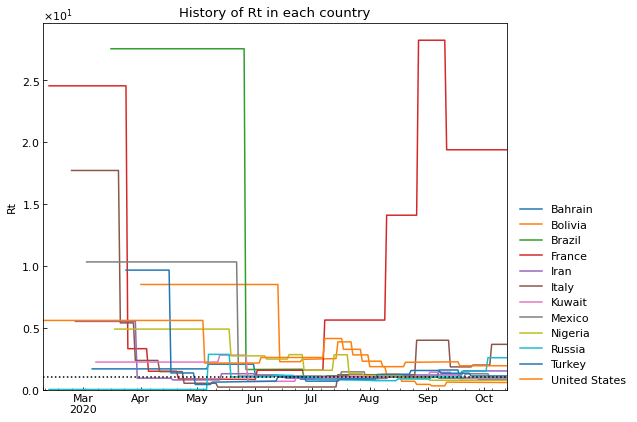

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,
2020-10-09,0.81,0.58,0.96,19.36,1.51,3.66,0.9,0.99,0.76,2.58,1.11,1.93
2020-10-10,0.81,0.58,0.96,19.36,1.51,3.66,0.9,0.99,0.76,2.58,1.11,1.93
2020-10-11,0.81,0.58,0.96,19.36,1.51,3.66,0.9,0.99,0.76,2.58,1.11,1.93
2020-10-12,0.81,0.58,0.96,19.36,1.51,3.66,0.9,0.99,0.76,2.58,1.11,1.93
2020-10-13,0.81,0.58,0.96,19.36,1.51,3.66,0.9,0.99,0.76,2.58,1.11,1.93


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

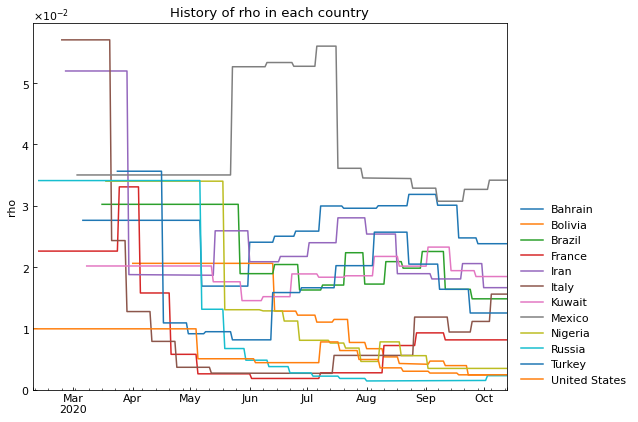

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,
2020-10-09,0.023792,0.002388,0.01481,0.00812,0.016628,0.015577,0.018442,0.034144,0.00347,0.002285,0.0125,0.002425
2020-10-10,0.023792,0.002388,0.01481,0.00812,0.016628,0.015577,0.018442,0.034144,0.00347,0.002285,0.0125,0.002425
2020-10-11,0.023792,0.002388,0.01481,0.00812,0.016628,0.015577,0.018442,0.034144,0.00347,0.002285,0.0125,0.002425
2020-10-12,0.023792,0.002388,0.01481,0.00812,0.016628,0.015577,0.018442,0.034144,0.00347,0.002285,0.0125,0.002425
2020-10-13,0.023792,0.002388,0.01481,0.00812,0.016628,0.015577,0.018442,0.034144,0.00347,0.002285,0.0125,0.002425


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

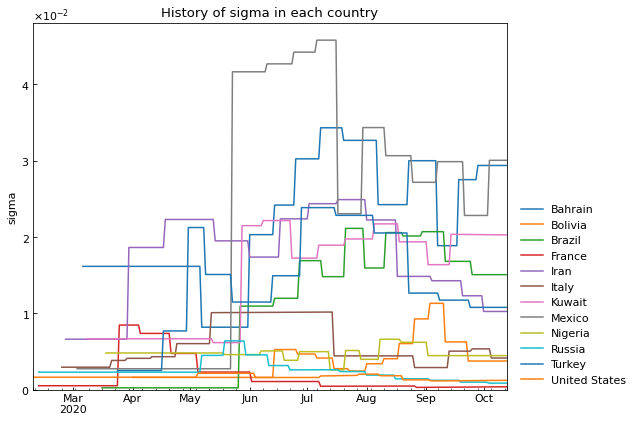

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,
2020-10-09,0.02938,0.003758,0.015072,0.000382,0.01025,0.004151,0.020279,0.030056,0.004466,0.00086,0.010788,0.001229
2020-10-10,0.02938,0.003758,0.015072,0.000382,0.01025,0.004151,0.020279,0.030056,0.004466,0.00086,0.010788,0.001229
2020-10-11,0.02938,0.003758,0.015072,0.000382,0.01025,0.004151,0.020279,0.030056,0.004466,0.00086,0.010788,0.001229
2020-10-12,0.02938,0.003758,0.015072,0.000382,0.01025,0.004151,0.020279,0.030056,0.004466,0.00086,0.010788,0.001229
2020-10-13,0.02938,0.003758,0.015072,0.000382,0.01025,0.004151,0.020279,0.030056,0.004466,0.00086,0.010788,0.001229


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

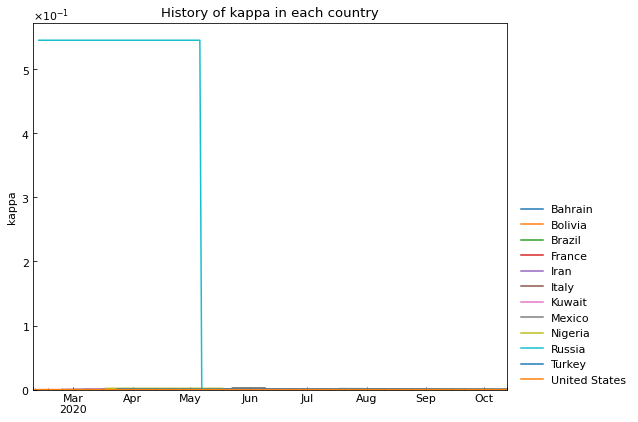

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,
2020-10-09,0.000059,0.000093,0.000384,0.000037,0.000415,0.000098,0.000002,0.000452,0.000045,0.000024,0.000109,0.000024
2020-10-10,0.000059,0.000093,0.000384,0.000037,0.000415,0.000098,0.000002,0.000452,0.000045,0.000024,0.000109,0.000024
2020-10-11,0.000059,0.000093,0.000384,0.000037,0.000415,0.000098,0.000002,0.000452,0.000045,0.000024,0.000109,0.000024
2020-10-12,0.000059,0.000093,0.000384,0.000037,0.000415,0.000098,0.000002,0.000452,0.000045,0.000024,0.000109,0.000024
2020-10-13,0.000059,0.000093,0.000384,0.000037,0.000415,0.000098,0.000002,0.000452,0.000045,0.000024,0.000109,0.000024


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

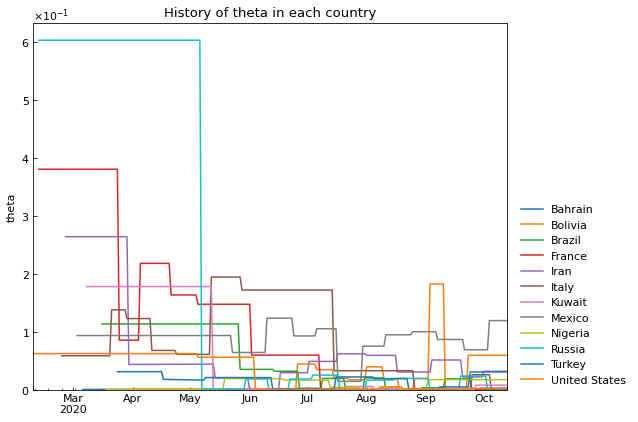

Country,Bahrain,Bolivia,Brazil,France,Iran,Italy,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,
2020-10-09,0.002531,0.059281,0.000652,0.0007,0.031741,0.000434,0.007897,0.119207,0.017358,0.001623,0.030618,0.002448
2020-10-10,0.002531,0.059281,0.000652,0.0007,0.031741,0.000434,0.007897,0.119207,0.017358,0.001623,0.030618,0.002448
2020-10-11,0.002531,0.059281,0.000652,0.0007,0.031741,0.000434,0.007897,0.119207,0.017358,0.001623,0.030618,0.002448
2020-10-12,0.002531,0.059281,0.000652,0.0007,0.031741,0.000434,0.007897,0.119207,0.017358,0.001623,0.030618,0.002448
2020-10-13,0.002531,0.059281,0.000652,0.0007,0.031741,0.000434,0.007897,0.119207,0.017358,0.001623,0.030618,0.002448


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48009 entries, 0 to 48162
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 48009 non-null  datetime64[ns]
 1   Country                              48009 non-null  object        
 2   Rt                                   48009 non-null  float64       
 3   theta                                48009 non-null  float64       
 4   kappa                                48009 non-null  float64       
 5   rho                                  48009 non-null  float64       
 6   sigma                                48009 non-null  float64       
 7   School_closing                       48009 non-null  int64         
 8   Workplace_closing                    48009 non-null  int64         
 9   Cancel_events                        48009 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.117349,-0.256688,0.121297,-0.215743,-0.158995,-0.079639,-0.265059,-0.018121,-0.184462,-0.246558,-0.122378,-0.318923,-0.092197,-0.185546,-0.230837,-0.178880
theta,-0.117349,1.000000,0.949081,0.799493,-0.032061,-0.228432,-0.188667,-0.335485,-0.227396,-0.222293,0.174836,-0.020203,0.074991,-0.414401,-0.442481,-0.105436,-0.139156
kappa,-0.256688,0.949081,1.000000,0.770925,-0.074787,-0.217921,-0.155869,-0.284942,-0.177036,-0.181372,0.211432,0.029832,0.218775,-0.362808,-0.305856,-0.023613,-0.104675
rho,0.121297,0.799493,0.770925,1.000000,0.152737,-0.146100,-0.089452,-0.298805,-0.135912,-0.166598,0.214401,0.044465,0.064939,-0.365597,-0.459347,-0.127574,-0.062279
sigma,-0.215743,-0.032061,-0.074787,0.152737,1.000000,0.201653,0.069259,0.131878,-0.027557,0.083874,0.132809,0.036575,-0.031310,0.076455,-0.138740,0.121282,0.162550
School_closing,-0.158995,-0.228432,-0.217921,-0.146100,0.201653,1.000000,0.708620,0.764327,0.602619,0.591681,0.569320,0.534650,0.413010,0.670298,0.463831,0.233313,0.808707
Workplace_closing,-0.079639,-0.188667,-0.155869,-0.089452,0.069259,0.708620,1.000000,0.725669,0.674824,0.612730,0.609670,0.556729,0.477115,0.782626,0.472697,0.333362,0.857927
Cancel_events,-0.265059,-0.335485,-0.284942,-0.298805,0.131878,0.764327,0.725669,1.000000,0.625326,0.492584,0.494846,0.482371,0.520838,0.850501,0.600378,0.571227,0.805575
Gatherings_restrictions,-0.018121,-0.227396,-0.177036,-0.135912,-0.027557,0.602619,0.674824,0.625326,1.000000,0.743625,0.639164,0.734771,0.517038,0.673417,0.499487,0.259181,0.842961
Transport_closing,-0.184462,-0.222293,-0.181372,-0.166598,0.083874,0.591681,0.612730,0.492584,0.743625,1.000000,0.649551,0.753815,0.424141,0.458864,0.387496,0.031306,0.766932


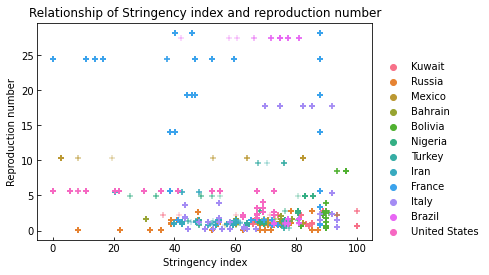

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()